<a href="https://colab.research.google.com/github/AIKevin/machine_learning_with_python/blob/master/principal_component_analysis_pw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis

The Iris flower dataset or Fisher’s Iris dataset is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper (FISHER 1936).

The data set consists of 50 samples from each of three species of Iris. Four features were measured from each sample.

The three species in the Iris dataset are:



1.   Iris-setosa ( n1=50)
2.   Iris-versicolor ( n2=50)
3.    Iris-virginica ( n3=50)





And the four features in Iris dataset are:

sepal length in cm<br>
sepal width in cm<br>
petal length in cm<br>
petal width in cm<br> 

## Load the dataset

To load te dataset, we will use  ***pandas*** library.

### 1.1  Loading the dataset

In [0]:
import pandas as pd
from sklearn.datasets import load_iris


In [0]:
dataset=load_iris()
data_frame=pd.DataFrame(dataset["data"],columns=["petal_length","petal_width","sepal_length","sepal_width"])
data_frame["class"]=dataset["target"]
data_frame["class"]=data_frame["class"].apply(lambda x: dataset["target_names"][x]) # We load the data

### 1.2 Display Data

In [0]:
data_frame.head() # we display the first rows of the data

,petal_length,petal_width,sepal_length,sepal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 1.3 Iris dataset stats
Here is a little stat study about our data

In [0]:
data_frame.describe()

,petal_length,petal_width,sepal_length,sepal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Standardize the data

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Separating out the features
x = data_frame.loc[:, features].values

# Separating out the target
y = data_frame.loc[:,['class']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

## Exploraory Analysis

### 2 - Comparing stats

We are comparing here the means and the quartiles of the 3 different classes for the 4 different features.<br>
For this we are using boxpplots.

In [0]:
import matplotlib.pyplot as plt

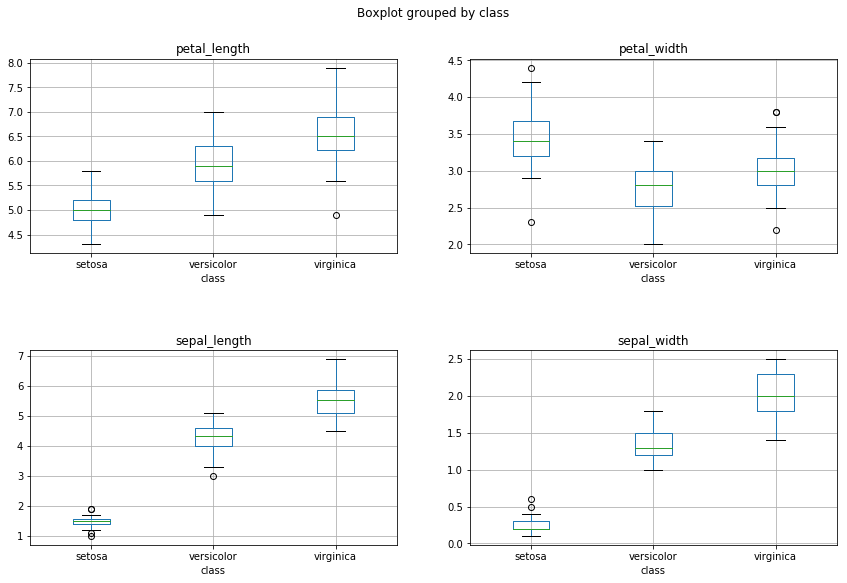

In [0]:

fig, ax = plt.subplots(2, 2, figsize=(14, 9))
plt.subplots_adjust( hspace=0.5)

data_frame.boxplot('petal_length','class', ax=ax[0][0])
data_frame.boxplot('petal_width','class', ax=ax[0][1])
data_frame.boxplot('sepal_length','class', ax=ax[1][0])
data_frame.boxplot('sepal_width','class', ax=ax[1][1])

**COMMENTS**: <br>
*Comment the boxplots*

### 3 - Feature Visualization

Given the  data, we plot for each feature a frequency histogram for each flower class, and a density function that approximates thoses histograms

In [0]:
#We define a method to set plot parameters like the title, the legend, and axises.
def set_plot(ax, xlabel, ylabel, title, legend):
  ax.set_xlabel(xlabel, fontsize = 15)
  ax.set_ylabel(ylabel, fontsize = 15)
  ax.set_title(title, fontsize = 17)
  ax.legend(legend)

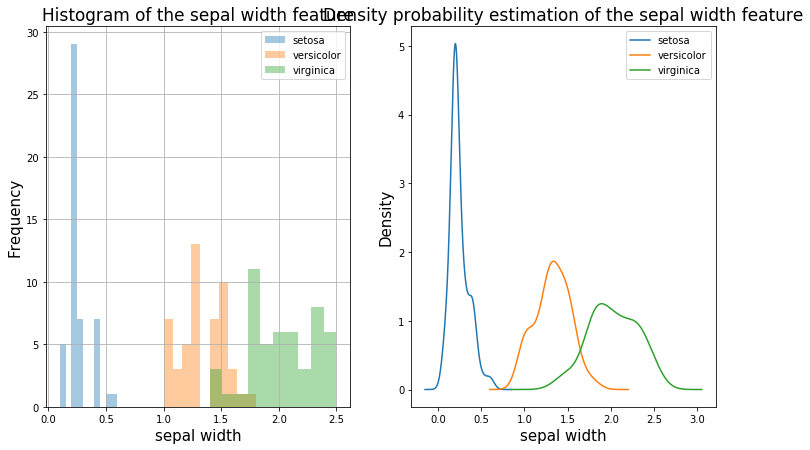

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))


p1=data_frame.groupby("class").sepal_width.plot(kind='kde', ax=ax[1])
p2 =data_frame.groupby("class").sepal_width.hist(alpha=0.4, ax=ax[0])

set_plot(ax[1], "sepal width", "Density", "Density probability estimation of the sepal width feature", ["setosa","versicolor","virginica"])
set_plot(ax[0], "sepal width", "Frequency", "Histogram of the sepal width feature", ["setosa","versicolor","virginica"])

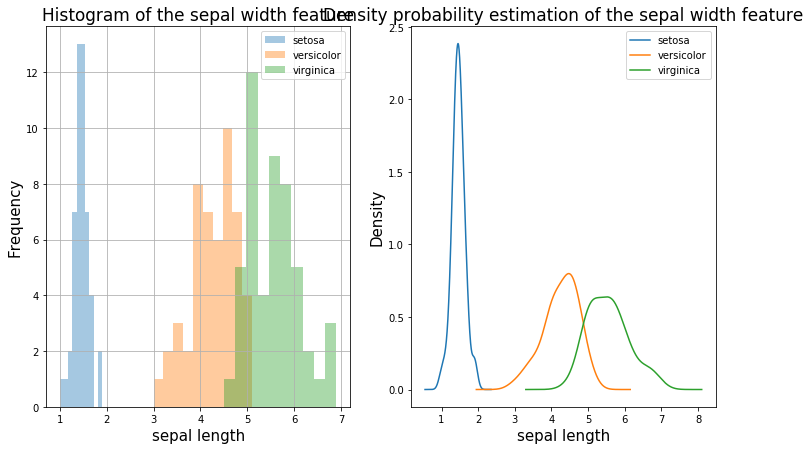

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))

data_frame.groupby("class").sepal_length.plot(kind='kde', ax=ax[1])
data_frame.groupby("class").sepal_length.hist(alpha=0.4, ax=ax[0])

set_plot(ax[1], "sepal length", "Density", "Density probability estimation of the sepal width feature", ["setosa","versicolor","virginica"])
set_plot(ax[0], "sepal length", "Frequency", "Histogram of the sepal width feature", ["setosa","versicolor","virginica"])

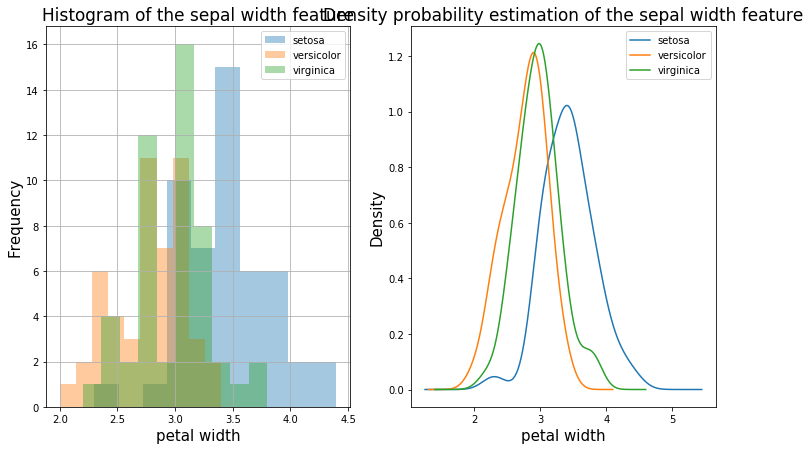

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))


data_frame.groupby("class").petal_width.plot(kind='kde', ax=ax[1])
data_frame.groupby("class").petal_width.hist(alpha=0.4, ax=ax[0])


set_plot(ax[1], "petal width", "Density", "Density probability estimation of the sepal width feature", ["setosa","versicolor","virginica"])
set_plot(ax[0], "petal width", "Frequency", "Histogram of the sepal width feature", ["setosa","versicolor","virginica"])

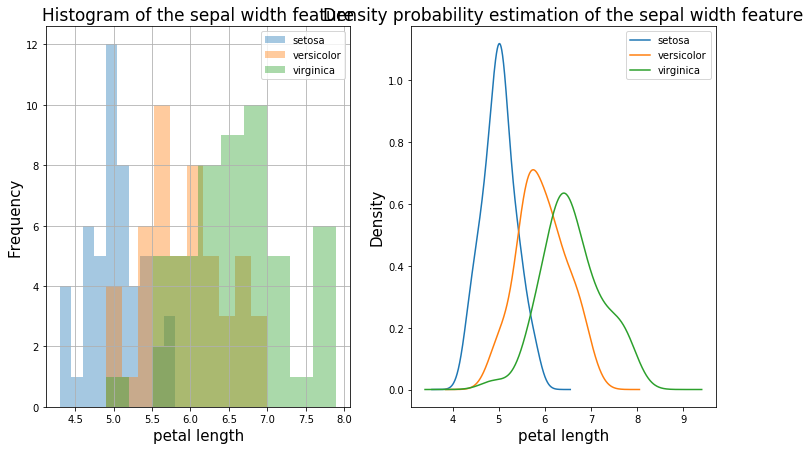

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))


data_frame.groupby("class").petal_length.plot(kind='kde', ax=ax[1])
data_frame.groupby("class").petal_length.hist(alpha=0.4, ax=ax[0])


set_plot(ax[1], "petal length", "Density", "Density probability estimation of the sepal width feature", ["setosa","versicolor","virginica"])
set_plot(ax[0], "petal length", "Frequency", "Histogram of the sepal width feature", ["setosa","versicolor","virginica"])

## PCA

### 4 - Applying PCA on the Iris dataset

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=4).fit(x)

Below are the Principal Components of the PCA. These are axises of the PCA new space. 
Let's remind that the main goal of PCA is to find a space (which dimension is as below as possible to the original data space) where the projected data still keeps as much as possible, its variance.
<br>


In [0]:
print(pca.components_)

[[ 0.5804131   0.56485654  0.52106591 -0.26934744]
 [ 0.02449161  0.06694199  0.37741762  0.92329566]
 [ 0.14212637  0.63427274 -0.71956635  0.24438178]
 [ 0.80144925 -0.52359713 -0.26128628  0.12350962]]


In [0]:
# We retrieve the projected data on the principal components
projected_data = pca.transform(x)
PC_df = pd.DataFrame(data = projected_data
             , columns = ['PC1', 'PC2', 'PC3', 'PC4'])

These are the coordinates of the 4 first individuals in the PCA new space (which axises are the eigenvectors of the covariance/correlation matrix of the features).
In other words, these are the projections of the individuals in the new space.

In [0]:
PC_df.head()

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


In [0]:
finalDf = pd.concat([PC_df, data_frame[['class']]], axis = 1)


### 5.1 Scree plot

Below are computed the explained variance per Principal Component, and also the explaines variance ratio per PC.

We can see that, the 2 first PCs explain more than 95% of the data total variance. We can then project those data on a 2D map and still keep almost all the informations in the data.

In [0]:
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [0]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

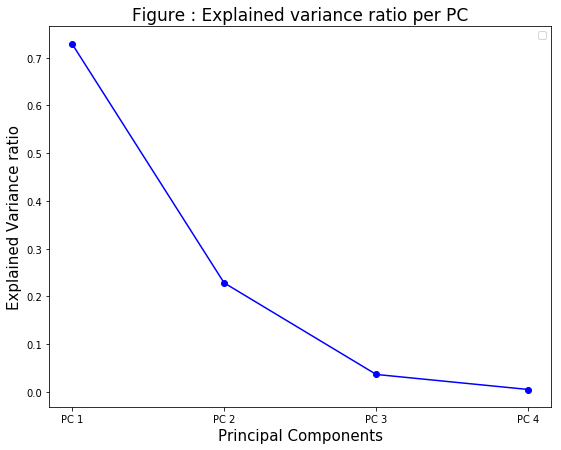

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))

ax.plot(["PC 1","PC 2","PC 3","PC 4"], pca.explained_variance_ratio_, "bo-")
set_plot(ax, "Principal Components","Explained Variance ratio","Figure : Explained variance ratio per PC",[])

### 5.2 Graph of individuals

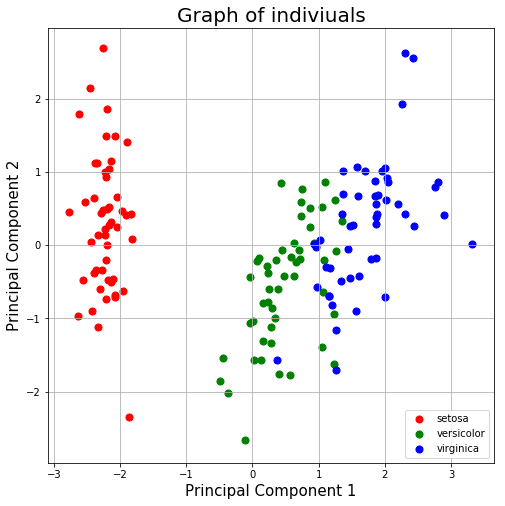

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Graph of indiviuals', fontsize = 20)


targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']


for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### 5.3 Graph of Variables

In [0]:
import numpy as np

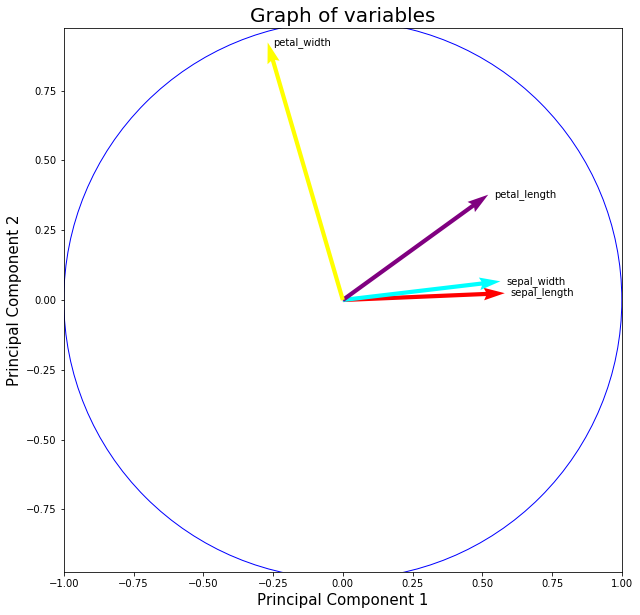

In [0]:
PCs = pca.components_

# Use quiver to generate the basic plot
fig = plt.figure(figsize=(10,10))
plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
           PCs[0,:], PCs[1,:], 
           angles='xy', scale_units='xy', scale=1, color = ["red", "cyan", "purple", "yellow"])

# Add labels based on feature names
feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
for i,j,z in zip(PCs[1,:]+0.02, PCs[0,:]+0.02, feature_names):
    plt.text(j, i, z, ha='left', va='top')

# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-1.0,1.0])
plt.ylim([-1.0,1.0])

plt.title("Graph of variables",  fontsize = 20)
# Label axes
plt.xlabel('Principal Component 1', fontsize = 15)
_=plt.ylabel('Principal Component 2', fontsize = 15)

### 5.4 Biplot

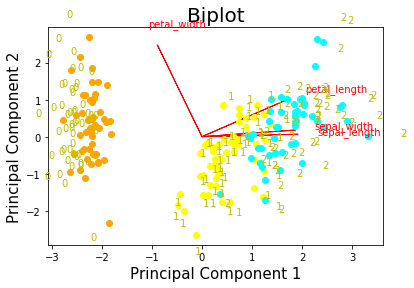

In [0]:

# 0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(x)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(x)[:,1]


for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
  plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
  plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])[i], color='r')

colors = ["orange", "yellow", "cyan"]
labels=data_frame["class"].astype('category').cat.codes.values
for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
  plt.plot(xs[i], ys[i], 'bo', color=colors[labels[i]])
  plt.text(xs[i]*1.2, ys[i]*1.2, labels[i], color='y')


plt.title("Biplot",  fontsize = 20)
# Label axes
plt.xlabel('Principal Component 1', fontsize = 15)
_=plt.ylabel('Principal Component 2', fontsize = 15)

## Step-by-step PCA

### 6 - Data splitting
See above (Standardize the data)

### 7- Standardization

See above (Standardize the data)

### 8 - Covariance Matrix

In [0]:
import numpy as np

In [0]:
covariances = np.cov(x.transpose((1,0)))

### 9 - Covariance Matrix EigenDecomposition 

In [0]:
eigen_values, eigen_vectors = np.linalg.eig(covariances)

In [0]:
print("Eigen values")
print(eigen_values)
print()
print("Eigen Vectors")
print(eigen_vectors)

Eigen values
[2.93808505 0.02085386 0.14774182 0.9201649 ]

Eigen Vectors
[[ 0.5804131   0.80144925  0.14212637  0.02449161]
 [ 0.56485654 -0.52359713  0.63427274  0.06694199]
 [ 0.52106591 -0.26128628 -0.71956635  0.37741762]
 [-0.26934744  0.12350962  0.24438178  0.92329566]]


### 10 - Correlation Matrix

In [0]:
rs = np.random.RandomState(0)
corr = data_frame.corr()
corr.style.background_gradient(cmap="Blues")

,petal_length,petal_width,sepal_length,sepal_width
petal_length,1,-0.11757,0.871754,0.817941
petal_width,-0.11757,1,-0.42844,-0.366126
sepal_length,0.871754,-0.42844,1,0.962865
sepal_width,0.817941,-0.366126,0.962865,1


In [0]:
corr

,petal_length,petal_width,sepal_length,sepal_width
petal_length,1.000000,-0.117570,0.871754,0.817941
petal_width,-0.117570,1.000000,-0.428440,-0.366126
sepal_length,0.871754,-0.428440,1.000000,0.962865
sepal_width,0.817941,-0.366126,0.962865,1.000000


### 11 - Correlation Matrix Eigendecomposition

In [0]:
corr_eigen_values, corr_eigen_vectors = np.linalg.eig(corr.values)

In [0]:
corr_eigen_values

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [0]:
corr_eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

We can see that 

### 12 - Explained variance

In [0]:
explained_variation = eigen_values/np.sum(eigen_values)
explained_variation

array([0.72962445, 0.00517871, 0.03668922, 0.22850762])

In [0]:
cum_explained_variation = np.cumsum(explained_variation)
cum_explained_variation

array([0.72962445, 0.73480316, 0.77149238, 1.        ])

### 13 - Scree plot

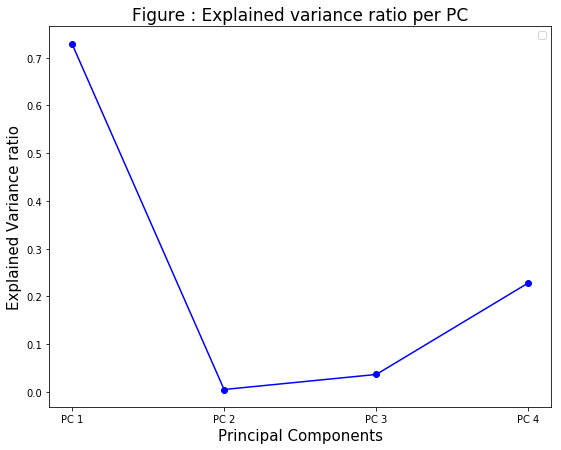

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
ax.plot(["PC 1","PC 2","PC 3","PC 4"], explained_variation, "bo-")
set_plot(ax, "Principal Components","Explained Variance ratio","Figure : Explained variance ratio per PC",[])

### 14 - Projection Matrix

In [0]:
projection_matrix = eigen_vectors[:, 0:2]
projection_matrix

array([[ 0.5804131 ,  0.80144925],
       [ 0.56485654, -0.52359713],
       [ 0.52106591, -0.26128628],
       [-0.26934744,  0.12350962]])

### 15 - Projected individuals

In [0]:
projected_data = x @ projection_matrix #matrix multiplication

### 16 - Graph of individuals

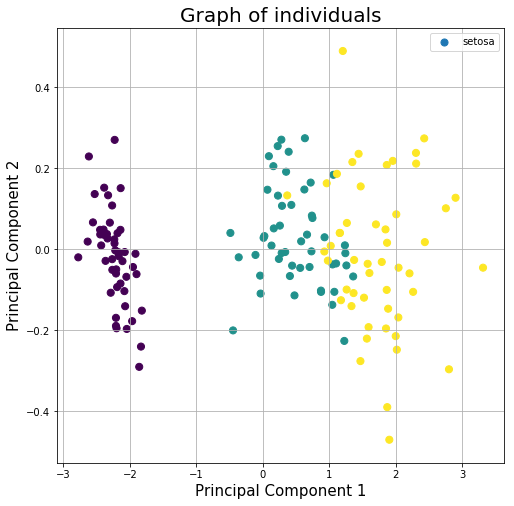

In [0]:
targets = ['setosa', 'versicolor', 'virginica']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Graph of individuals', fontsize = 20)


labels=data_frame["class"].astype('category').cat.codes.values
ax.scatter(projected_data[:, 0] , projected_data[:, 1]
               , s = 50, c=labels, cmap="viridis" )
ax.legend(targets)
ax.grid()